In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load

from sklearn.model_selection import train_test_split


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [3]:
train_dir=r'C:\Users\DELL\Desktop\knee\JPDL12-A Novel Method to Predict Knee Osteoarthritis\JPDL12-A Novel Method to Predict Knee Osteoarthritis\SOURCE CODE\Knee Osteoarthritis\model\train'
test_dir=r'C:\Users\DELL\Desktop\knee\JPDL12-A Novel Method to Predict Knee Osteoarthritis\JPDL12-A Novel Method to Predict Knee Osteoarthritis\SOURCE CODE\Knee Osteoarthritis\model\test'

In [4]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [5]:
#  1574 + 737

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [7]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 995 images belonging to 5 classes.


In [8]:
base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [9]:
base_model.trainable = False

In [10]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten

In [13]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = classifier.fit(train_data_gen, epochs=10,
validation_data= val_data_gen,)

Epoch 1/10


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


165/165 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.3524 - loss: 1.8164 - val_accuracy: 0.5397 - val_loss: 1.2073
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.6168 - loss: 0.9808 - val_accuracy: 0.6633 - val_loss: 0.8100
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7148 - loss: 0.7024 - val_accuracy: 0.8302 - val_loss: 0.5074
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.7809 - loss: 0.5628 - val_accuracy: 0.8482 - val_loss: 0.4392
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.8252 - loss: 0.4747 - val_accuracy: 0.8593 - val_loss: 0.3804
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.8559 - loss: 0.4083 - val_accuracy: 0.9266 - val_loss: 0.2778
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 1476s 9s/step - accuracy: 0.8634 - loss: 0.3999 - val_accuracy: 0.9327 - val_loss: 0.2706
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9085 - loss: 0.2797 - val_accuracy: 0.93

In [16]:
classifier.save('knee_vgg16.h5')

In [17]:
#pip install Pillow

In [18]:
import numpy as np

In [19]:
y = np.concatenate([next(val_data_gen)[1] for _ in range(len(val_data_gen))])
true_labels = np.argmax(y, axis=-1)

# Get predictions
prediction = classifier.predict(val_data_gen, verbose=2)
prediction = np.argmax(prediction, axis=-1)

100/100 - 105s - 1s/step


In [20]:
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [23]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[187   0   4   0   0]
 [ 17 307  23   4   1]
 [  0   0 154   1   0]
 [  0   1  16 134   3]
 [  0   0   0   0 143]]
Accuracy: 0.930
Precision: 0.913
Recall: 0.930
F-Measure: 0.930


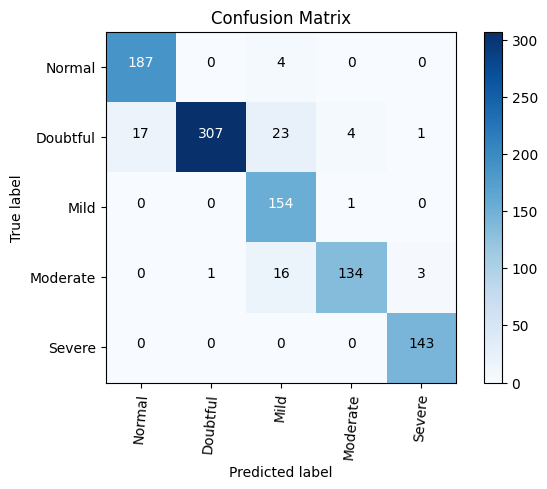

In [24]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)